In [9]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.colors as colors
import numpy as np
import powerlaw
from tree import Tree
from fire import Fire
from forest import Forest
from analysis import Analyse
import pandas as pd
# from forest_sim import run_simulation, initialize_forest


A first step in our work is to show that our basic model based on Turcotte (1999) does indeed show Self-Organized Criticality. In other words: (1) it has a steady input, (2) there are 'avalanches' of output of size proportional tot hat of the system and (3) the system remains at a quasi-equilibrium state. 

(1) This is determined by the design of the model, per each time step there is between 0 and 1 new trees planted. 

(2) This is shown by comparing the distribution of fire sizes (i.e. the output of the system) to a power law distribution 

(3) This is deduced from the fact that, after a period of growth in number of trees, reaches a stable number of trees around which it oscillates. 

In [28]:
L = 50
g = 1
f = 50
timesteps = 10**4
instances = 30
freeze_time_during_fire = True
remember_history = False
analysis_exp =  Analyse(L, g, f, freeze_time_during_fire, remember_history, timesteps, instances)
analysis_exp.run_all()
analysis_exp.find_proportion_power_law()

60.0% of the model instances are best fitted by a power law distribution


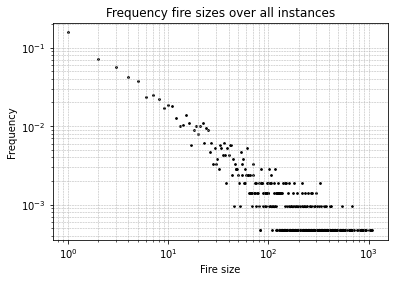

In [32]:
# (2)
print(f'{analysis_exp.proportion_power_law * 100}% of the model instances are best fitted by a power law distribution')
analysis_exp.log_log_plot()

In [ ]:
# (3)

In [31]:
analysis_exp.proportion_power_law

0.6

In [18]:
print(analysis_exp.trees_timeseries[0][:20])
pd.Series(analysis_exp.trees_timeseries[0][:20]).rolling(3, center = True).mean()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


0      NaN
1      2.0
2      3.0
3      4.0
4      5.0
5      6.0
6      7.0
7      8.0
8      9.0
9     10.0
10    11.0
11    12.0
12    13.0
13    14.0
14    15.0
15    16.0
16    17.0
17    18.0
18    19.0
19     NaN
dtype: float64

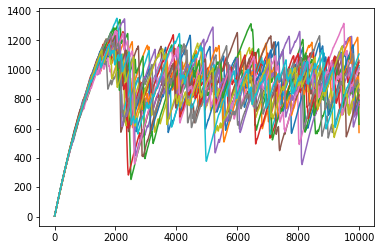

In [27]:
X = range(timesteps)
for timeseries in analysis_exp.trees_timeseries:
    Y = pd.Series(timeseries).rolling(10, center = True).mean()
    plt.plot(X,Y)

plt.show()

In [ ]:
print(analysis_exp.find_proportion_power_law())
analysis_exp.log_log_plot()

In [ ]:
analysis_exp.proportion_power_law

In [ ]:
L = 100
g = 1
f = 50
timesteps = 10**5
instances = 10
freeze_time_during_fire = True
remember_history = False

analysis_exp =  Analyse(L, g, f, freeze_time_during_fire, remember_history, timesteps, instances)
analysis_exp.run_all()
print(analysis_exp.find_proportion_power_law())
analysis_exp.log_log_plot(3)

In [ ]:
analysis_exp.proportion_power_law

Ilias Data analys

In [ ]:
# Parameters
size: tuple = (50, 50) 
tree_density: float = 0.01
iterations: int = 50000
fire_start: tuple = (250, 250)
growth_prob: float = 0.001
ortho_burn_prob: float = 0.8
diag_burn_prob: float = 0.8
lightning_prob: float = 0.0001 
FireLength: int  = 0
arrayOfFireLengths: list[int] = []
forest = initialize_forest(size=size, tree_density=tree_density) 

In [ ]:
FireLength, arrayOfFireLengths  = run_simulation(size=size, tree_density=tree_density, iterations=iterations, fire_start=fire_start, growth_prob=growth_prob, lightning_prob=lightning_prob, ortho_burn_prob=ortho_burn_prob, diag_burn_prob=diag_burn_prob, FireLength=FireLength, arrayOfFireLengths=arrayOfFireLengths)


In [ ]:
y = np.bincount(arrayOfFireLengths)
x = np.nonzero(a=y)[0]
plt.scatter(x=x, y=y[x])
plt.xscale(value='log')
plt.yscale(value='log')
plt.show()
plt.hist(arrayOfFireLengths, bins=50)
plt.show()
results = powerlaw.Fit(data=arrayOfFireLengths)
print(results.power_law.alpha)
print(results.power_law.xmin)
R, p = results.distribution_compare(dist1='truncated_power_law', dist2='lognormal')
print(R, p)

In [ ]:
unique_identifiers = range(len(arrayOfFireLengths))
plt.plot(unique_identifiers, arrayOfFireLengths)

plt.xlabel('Fire Events')
plt.ylabel('Length of Fire')
plt.title('Bar Plot of Fire Lengths Over Time')

plt.show()

In [ ]:
print(max(arrayOfFireLengths))


In [ ]:
# Total number of clusters
from collections import Counter


total_clusters = len(arrayOfFireLengths)
frequency_distribution = Counter(arrayOfFireLengths)
# Normalizing by the total number of clusters
n_s_clusters = {s: freq / total_clusters for s, freq in frequency_distribution.items()}


# Normalizing by the total number of sites
# n_s_sites = {s: freq / total_sites for s, freq in frequency_distribution.items()}
# Prepare data for plotting
cluster_sizes = np.array(list(n_s_clusters.keys()))/max(arrayOfFireLengths)
frequencies = np.array(list(n_s_clusters.values()))

# Filter out zero frequencies for log-log plot
nonzero_indices = frequencies > 0
cluster_sizes = cluster_sizes[nonzero_indices]
frequencies = frequencies[nonzero_indices]

# Create a log-log plot
plt.figure(figsize=(10, 6))
plt.loglog(cluster_sizes, frequencies, 'o')  
plt.xlabel(xlabel='Cluster Size (s)')
plt.ylabel(ylabel='Normalized Frequency (n(s))')
plt.title(label='Log-Log Plot of Cluster Size Distribution')
plt.grid(visible=True)
plt.show()